# Goal: Effectiveness of 4 drugs "Capomulin","Infubinol","Ketapril","Placebo"


 Findings: 

        --For parameter "Tumor Response to Treatment" the tumor volume is reduced over the period for drug Capomulin and all other drug treatments the tumor volume is increased. 
        -- For parameter "Metastatic response" ,drug Capomulin is less. 
        -- For parameter "Survival Rate" , Capomulin has higher survival rate 84%, Infubinol has lower survival rate of 20%. Ketapril and Placebo have survival rate of 44%

Conclusion:
Capomulin has more effectiveness when compared to other three drugs for Tumor Volume Treatment



In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
mouse_df.head()
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)
clinical_data_df.head()

# mouse_df.info()
# mouse_df["Mouse ID"].nunique()
# mouse_df.head()
# clinical_data_df.info()
# mouse_df[mouse_df["Mouse ID"].duplicated()]
# mouse_df.drop_duplicates(subset=mouse_df["Mouse ID"], keep="first", inplace=True)
# mouse_df[mouse_df["Mouse ID"].isin(mouse_df["Mouse ID"][mouse_df["Mouse ID"].duplicated()])]
# Combine the data into a single dataset
combined_df = clinical_data_df.merge(mouse_df,how="left",left_on="Mouse ID", right_on="Mouse ID",sort=False)



# Display the data table for preview
combined_df.head()
combined_df_html=combined_df.to_html()
print(combined_df_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Mouse ID</th>
      <th>Timepoint</th>
      <th>Tumor Volume (mm3)</th>
      <th>Metastatic Sites</th>
      <th>Drug</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>b128</td>
      <td>0</td>
      <td>45.000000</td>
      <td>0</td>
      <td>Capomulin</td>
    </tr>
    <tr>
      <th>1</th>
      <td>f932</td>
      <td>0</td>
      <td>45.000000</td>
      <td>0</td>
      <td>Ketapril</td>
    </tr>
    <tr>
      <th>2</th>
      <td>g107</td>
      <td>0</td>
      <td>45.000000</td>
      <td>0</td>
      <td>Ketapril</td>
    </tr>
    <tr>
      <th>3</th>
      <td>a457</td>
      <td>0</td>
      <td>45.000000</td>
      <td>0</td>
      <td>Ketapril</td>
    </tr>
    <tr>
      <th>4</th>
      <td>c819</td>
      <td>0</td>
      <td>45.000000</td>
      <td>0</td>
      <td>Ketapril</td>
    </tr>
    <tr>
      <th>5</th>
      <td>h24

## Tumor Response to Treatment

In [25]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grp_drug_timepoint = combined_df.groupby(["Drug","Timepoint"])
grp_drug_timepoint_mean = grp_drug_timepoint["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
mean_df=pd.DataFrame(grp_drug_timepoint_mean,index=None).reset_index()
# Preview DataFrame
mean_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [26]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grp_drug_timepoint_sem  = grp_drug_timepoint["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
sem_df = pd.DataFrame(grp_drug_timepoint_sem).reset_index()
# Preview DataFrame
sem_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [27]:
# Minor Data Munging to Re-Format the Data Frames
formatted_mean_df = mean_df.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
# Preview that Reformatting worked
formatted_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [28]:
formatted_sem_df = sem_df.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
# Preview that Reformatting worked
formatted_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


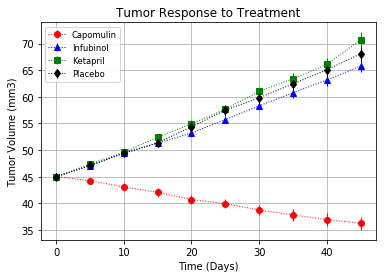

In [29]:
# Generate the Plot (with Error Bars)
fig, ax =  plt.subplots(1,1)
ax.grid()

# Capomulin,Infubinol,Ketapril,Placebo

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")

for col in formatted_mean_df.columns:
    if col in ("Capomulin","Infubinol","Ketapril","Placebo"):
        
        if col == "Capomulin":
            l_color="r"
            l_marker="o"
        if col == "Infubinol":
            l_color="b"
            l_marker="^"
        if col == "Ketapril":
            l_color="g"
            l_marker="s"
        if col == "Placebo":
            l_color="black"
            l_marker="d"
        
        ax.errorbar(formatted_mean_df.index.values,formatted_mean_df[col],formatted_sem_df[col],label=col,color=l_color,marker=l_marker , linestyle='dotted',
                   linewidth=1.0)
    

ax.legend(loc="upper left",fontsize='small')
# Save the Figure
plt.savefig("plot_error_bars.png", dpi=400, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format="png",
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)


In [30]:
# Show the Figure
plt.show(fig)

## Metastatic Response to Treatment

In [31]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grp_drug_timepoint_mssites_mean = grp_drug_timepoint["Metastatic Sites"].mean()
# Convert to DataFrame
mssites_mean_df=pd.DataFrame(grp_drug_timepoint_mssites_mean,index=None)
# Preview DataFrame
mssites_mean_df.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [32]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
grp_drug_timepoint_mssites_sem  = grp_drug_timepoint["Metastatic Sites"].sem()

# Convert to DataFrame
mssites_sem_df = pd.DataFrame(grp_drug_timepoint_mssites_sem)
# Preview DataFrame
mssites_sem_df.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [33]:
# Minor Data Munging to Re-Format the Data Frames
formatted_mssites_mean_df = mssites_mean_df.reset_index().pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
# Preview that Reformatting worked
formatted_mssites_mean_df.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [34]:
# Minor Data Munging to Re-Format the Data Frames
formatted_mssites_sem_df = mssites_sem_df.reset_index().pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
# Preview that Reformatting worked
formatted_mssites_sem_df.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


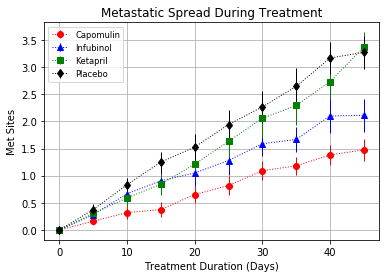

In [35]:
# Generate the Plot (with Error Bars)
fig, ax =  plt.subplots(1,1)
ax.grid()

# Capomulin,Infubinol,Ketapril,Placebo

ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met Sites")
ax.set_title("Metastatic Spread During Treatment")

for col in formatted_mssites_mean_df.columns:
    if col in ("Capomulin","Infubinol","Ketapril","Placebo"):
        
        if col == "Capomulin":
            l_color="r"
            l_marker="o"
        if col == "Infubinol":
            l_color="b"
            l_marker="^"
        if col == "Ketapril":
            l_color="g"
            l_marker="s"
        if col == "Placebo":
            l_color="black"
            l_marker="d"
        
        ax.errorbar(formatted_mssites_mean_df.index.values,formatted_mssites_mean_df[col],formatted_mssites_sem_df[col],label=col,color=l_color,marker=l_marker , linestyle='dotted',
                   linewidth=1.0)
    

ax.legend(loc="upper left",fontsize='small')
# Save the Figure
plt.savefig("metastatic_sites_plot_error_bars.png", dpi=400, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format="png",
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
# Show the Figure
plt.show(fig)


## Survival Rates

In [36]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grp_drug_timepoint_mice_cnt = grp_drug_timepoint["Mouse ID"].count()
# Convert to DataFrame
mice_cnt_df=pd.DataFrame(grp_drug_timepoint_mice_cnt,index=None).reset_index()
# Preview DataFrame
mice_cnt_df.head()



,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [37]:
# Minor Data Munging to Re-Format the Data Frames
formatted_mice_cnt_df = mice_cnt_df.reset_index().pivot(index="Timepoint",columns="Drug",values="Mouse ID")

# Preview the Data Frame
formatted_mice_cnt_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


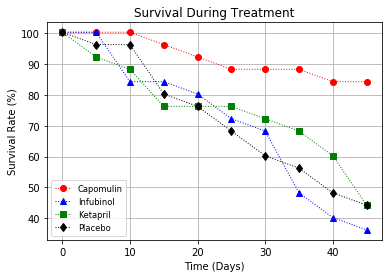

In [38]:
# Generate the Plot (Accounting for percentages)
# percent_formatted_mice_cnt_df = formatted_mice_cnt_df[[(formatted_mice_cnt_df[col]/combined_df["Mouse ID"].nunique())*100]]
fig, ax =  plt.subplots(1,1)
ax.grid()

# Capomulin,Infubinol,Ketapril,Placebo

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.set_title("Survival During Treatment")
# ax.set_yticklabels( range(30,101,10))
# yt=[ytick*10 for ytick in yticks]
ax.set_yticklabels(range(30,110,10))

for col in formatted_mice_cnt_df.columns:
    if col in ("Capomulin","Infubinol","Ketapril","Placebo"):
#         print(col)
        if col == "Capomulin":
            l_color="r"
            l_marker="o"
        if col == "Infubinol":
            l_color="b"
            l_marker="^"
        if col == "Ketapril":
            l_color="g"
            l_marker="s"
        if col == "Placebo":
            l_color="black"
            l_marker="d"
        
        
        ax.plot(formatted_mice_cnt_df.index.values,(formatted_mice_cnt_df[col]/combined_df["Mouse ID"].nunique())*100,label=col,color=l_color,marker=l_marker , linestyle='dotted',
                   linewidth=1.0)
#         yticks( 40,50,60,70,80,90,100)
#             formatted_mssites_mean_df.index.values,formatted_mssites_mean_df[col],formatted_mssites_sem_df[col],label=col,color=l_color,marker=l_marker , linestyle='dotted',
#                    linewidth=1.0)
    

ax.legend(loc="lower left",fontsize='small')
# Save the Figure
plt.savefig("mice_count_line.png", dpi=400, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format="png",
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
# Show the Figure
plt.show(fig)


## Summary Bar Graph

In [39]:
# Calculate the percent changes for each drug
tumor_vol_df=grp_drug_timepoint["Tumor Volume (mm3)"].mean()
drug_perc = {}

for drug in tumor_vol_df.index.get_level_values(0).unique():
#     print(tumor_vol_df.loc[(drug,tumor_vol_df.index.get_level_values(1).max())])
    l_perc_change = round(((tumor_vol_df.loc[(drug,tumor_vol_df.index.get_level_values(1).max())] - 
                      tumor_vol_df.loc[(drug,tumor_vol_df.index.get_level_values(1).min())])/
                     (tumor_vol_df.loc[(drug,tumor_vol_df.index.get_level_values(1).min())]))*100,6)
#     print(f"{drug} {l_perc_change}")
    drug_perc[drug] = l_perc_change
    
# print(drug_perc)
tumor_perc_chg_df =pd.Series(drug_perc)
tumor_perc_chg_df.rename_axis("Drug",inplace=True)

# print(l_perc_change)
# Display the data to confirm
tumor_perc_chg_df

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

{'Capomulin': -19.475303, 'Infubinol': 46.123472, 'Ketapril': 57.028795, 'Placebo': 51.29796}


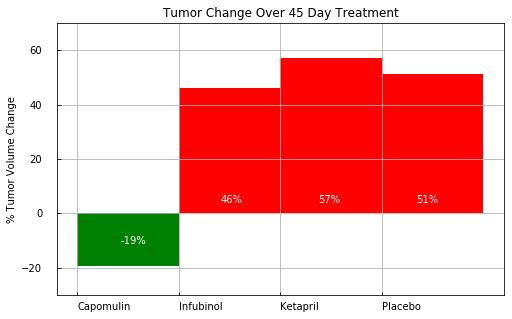

In [40]:
# Store all Relevant Percent Changes into a Tuple
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure
# y-axis=tuple([for ])
tpl_perc_changes = tuple([tumor_perc_chg_df[ind] for ind in tumor_perc_chg_df.index if ind in ("Capomulin","Infubinol",
                                                                            "Ketapril","Placebo")])

tpl_xaxis = ("Capomulin","Infubinol","Ketapril","Placebo")
dict_tpl_perc_changes=dict(zip(tpl_xaxis,tpl_perc_changes))
print(dict_tpl_perc_changes)
# bins = [-20,0,20,40,60]
# # Splice the data between passing and failing drugs
fig,ax = plt.subplots(1,1,figsize=(8, 5))

ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_yticks(range(-20,80,20))
# ax.set_yticklabels(range(-20,80,20))
xticks = ax.get_xticks()
# print(xticks)
text_x=-0.05
idx =1
for key,val in dict_tpl_perc_changes.items():
    text_x+=0.22
    idx+=1
    
    if val < 0:
        ax.bar(key, val ,width=1.0,align='edge',color='g')
        ax.text(text_x, 0.2, "{:.0f}%".format(val),horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,color='w')

    else:
        ax.bar(key, val ,width=1.0,align='edge',color='r')
        ax.text(text_x, 0.35, "{:.0f}%".format(val),horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,color='w')

# # ax.annotate(tpl_perc_changes)
ax.xaxis.set_label_coords(xticks[idx], 0)
ax.set_xticklabels(tpl_xaxis,{'horizontalalignment': 'center','verticalalignment': 'baseline'})
ax.tick_params(direction='in', pad=15)
plt.ylim(-30,70)
plt.setp(ax.xaxis.get_majorticklabels(),ha="left")
ax.grid()
# print(tpl_perc_changes)

plt.savefig("Tumor_Change.png", dpi=400, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format="png",
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

# Show the Figure
fig.show()